# Рубежный контроль №1

## Крайчиков О.Д. 
## ИУ5-61Б

## Импорт библиотек

In [20]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [21]:
data = pd.read_csv('marvel-wikia-data.csv', sep=',')

## Характеристики датасета

In [7]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [8]:
# Колонки с пропусками
cols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
cols_with_na

['ID',
 'ALIGN',
 'EYE',
 'HAIR',
 'SEX',
 'GSM',
 'ALIVE',
 'APPEARANCES',
 'FIRST APPEARANCE',
 'Year']

In [9]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in cols_with_na]

[('ID', 0.23021494870542256),
 ('ALIGN', 0.17171470444553005),
 ('EYE', 0.5964215925744992),
 ('HAIR', 0.26038104543234003),
 ('SEX', 0.052149487054225695),
 ('GSM', 0.9945041524181729),
 ('ALIVE', 0.00018319491939423546),
 ('APPEARANCES', 0.06692721055202736),
 ('FIRST APPEARANCE', 0.04976795310210064),
 ('Year', 0.04976795310210064)]

## Обработка пропусков для категориального признака

Можно заметить,что для признака "GSM" пропущенных данных слишком много (около 99%), следовательно нужно удалить признак (колонку) целиком.

In [10]:
data.drop(['GSM'], axis=1, inplace=True)

## Обработка пропусков для количественного признака

Поскольку в исследуемом датасете один количественный признак "Appearances" и процент пропусков для него составляет <5%, то будем использовать метод заполнения пропущенных значений показателями центра распределения.

Text(0.5, 1.0, 'Distribution of APPEARANCES')

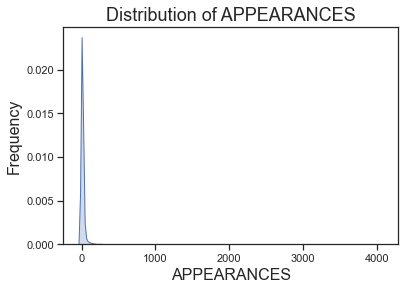

In [22]:
g = sns.kdeplot(data=data, x="APPEARANCES", shade=True)
g.set_xlabel("APPEARANCES", size = 16)
g.set_ylabel("Frequency", size = 16)
plt.title('Distribution of APPEARANCES', size = 18)

In [23]:
data[['APPEARANCES']].describe()

,APPEARANCES
count,15280.000000
mean,17.033377
std,96.372959
min,1.000000
25%,1.000000
50%,3.000000
75%,8.000000
max,4043.000000


Получаем одномодальное распределение, поэтому будем использовать моду для заполнения пустых значений.

In [24]:
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data[['APPEARANCES']])
imp_num = SimpleImputer(strategy='most_frequent')
data_num_imp = imp_num.fit_transform(data[['APPEARANCES']])
data['APPEARANCES'] =data_num_imp

## Характеристики датасета после обработки пропусков

In [25]:
# Колонки с пропусками
cols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
cols_with_na

['ID',
 'ALIGN',
 'EYE',
 'HAIR',
 'SEX',
 'GSM',
 'ALIVE',
 'FIRST APPEARANCE',
 'Year']

In [26]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in cols_with_na]

[('ID', 0.23021494870542256),
 ('ALIGN', 0.17171470444553005),
 ('EYE', 0.5964215925744992),
 ('HAIR', 0.26038104543234003),
 ('SEX', 0.052149487054225695),
 ('GSM', 0.9945041524181729),
 ('ALIVE', 0.00018319491939423546),
 ('FIRST APPEARANCE', 0.04976795310210064),
 ('Year', 0.04976795310210064)]

In [27]:
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


## Дополнительное требование

In [37]:
plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

<Figure size 864x432 with 0 Axes>

<AxesSubplot:xlabel='Year', ylabel='page_id'>

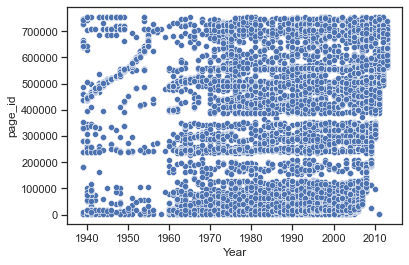

In [40]:
sns.scatterplot(x='Year', y='page_id', data=data)

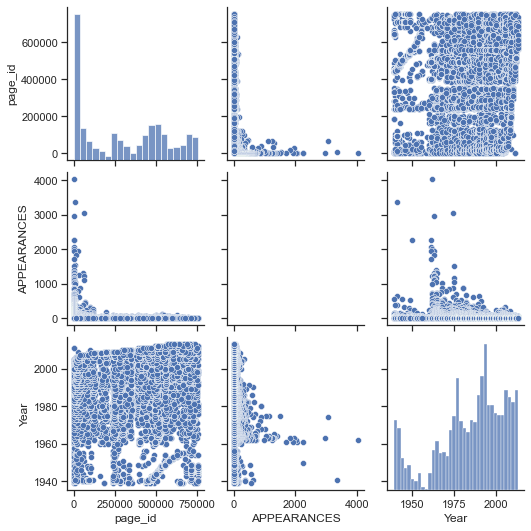

In [41]:
sns.pairplot(data)